In [3]:
### Load libraries
import io
import pandas as pd
import numpy as np
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

In [4]:
### Upload Diggs data
address = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/Stefon_Diggs_Gamelogs.csv'
Diggs = pd.read_csv(address)
Diggs = Diggs.drop(columns=Diggs.columns[21:56])
Diggs = Diggs.dropna()
Diggs

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,...,Rec,Yds,Y/R,TD,Ctch%,YdsPerTgt,Opp_Points_Allowed,Opp_PassYds,Opp_PassTD,Opp_Int
0,17.0,2016.0,9/11/16,1.0,1.0,22.287,MIN,A,TEN,W 25-16,...,7.0,103.0,14.71,0.0,0.778,11.44,23.6,269.2,1.56,0.75
1,18.0,2016.0,9/18/16,2.0,2.0,22.294,MIN,H,GNB,W 17-14,...,9.0,182.0,20.22,1.0,0.818,16.55,24.3,269.3,2.00,1.06
2,19.0,2016.0,9/25/16,3.0,3.0,22.301,MIN,A,CAR,W 22-10,...,4.0,40.0,10.00,0.0,0.571,5.71,25.1,268.2,1.69,1.06
3,20.0,2016.0,10/3/16,4.0,4.0,22.309,MIN,H,NYG,W 24-10,...,5.0,47.0,9.40,0.0,0.714,6.71,17.8,251.1,0.94,1.06
4,22.0,2016.0,10/23/16,6.0,7.0,22.329,MIN,A,PHI,L 10-21,...,2.0,18.0,9.00,0.0,0.400,3.60,20.7,239.5,1.56,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,92.0,2020.0,12/7/20,12.0,13.0,27.008,BUF,A,SFO,W 34-24,...,10.0,92.0,9.20,0.0,1.000,9.20,24.4,207.9,1.56,0.75
69,93.0,2020.0,12/13/20,13.0,14.0,27.014,BUF,H,PIT,W 26-15,...,10.0,130.0,13.00,1.0,0.714,9.29,19.5,194.4,1.38,1.13
70,94.0,2020.0,12/19/20,14.0,15.0,27.020,BUF,A,DEN,W 48-19,...,11.0,147.0,13.36,0.0,0.846,11.31,27.9,237.9,1.31,0.63
71,95.0,2020.0,12/28/20,15.0,16.0,27.029,BUF,A,NWE,W 38-9,...,9.0,145.0,16.11,3.0,0.818,13.18,22.1,222.3,1.38,1.13


In [5]:
### Change column name
Diggs['Yds_Per_Catch'] = Diggs['Y/R']
del Diggs['Y/R']
Diggs

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,...,Rec,Yds,TD,Ctch%,YdsPerTgt,Opp_Points_Allowed,Opp_PassYds,Opp_PassTD,Opp_Int,Yds_Per_Catch
0,17.0,2016.0,9/11/16,1.0,1.0,22.287,MIN,A,TEN,W 25-16,...,7.0,103.0,0.0,0.778,11.44,23.6,269.2,1.56,0.75,14.71
1,18.0,2016.0,9/18/16,2.0,2.0,22.294,MIN,H,GNB,W 17-14,...,9.0,182.0,1.0,0.818,16.55,24.3,269.3,2.00,1.06,20.22
2,19.0,2016.0,9/25/16,3.0,3.0,22.301,MIN,A,CAR,W 22-10,...,4.0,40.0,0.0,0.571,5.71,25.1,268.2,1.69,1.06,10.00
3,20.0,2016.0,10/3/16,4.0,4.0,22.309,MIN,H,NYG,W 24-10,...,5.0,47.0,0.0,0.714,6.71,17.8,251.1,0.94,1.06,9.40
4,22.0,2016.0,10/23/16,6.0,7.0,22.329,MIN,A,PHI,L 10-21,...,2.0,18.0,0.0,0.400,3.60,20.7,239.5,1.56,1.00,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,92.0,2020.0,12/7/20,12.0,13.0,27.008,BUF,A,SFO,W 34-24,...,10.0,92.0,0.0,1.000,9.20,24.4,207.9,1.56,0.75,9.20
69,93.0,2020.0,12/13/20,13.0,14.0,27.014,BUF,H,PIT,W 26-15,...,10.0,130.0,1.0,0.714,9.29,19.5,194.4,1.38,1.13,13.00
70,94.0,2020.0,12/19/20,14.0,15.0,27.020,BUF,A,DEN,W 48-19,...,11.0,147.0,0.0,0.846,11.31,27.9,237.9,1.31,0.63,13.36
71,95.0,2020.0,12/28/20,15.0,16.0,27.029,BUF,A,NWE,W 38-9,...,9.0,145.0,3.0,0.818,13.18,22.1,222.3,1.38,1.13,16.11


In [6]:
### change column name
Diggs['CtchPer'] = Diggs['Ctch%']
del Diggs['Ctch%']
Diggs

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,...,Rec,Yds,TD,YdsPerTgt,Opp_Points_Allowed,Opp_PassYds,Opp_PassTD,Opp_Int,Yds_Per_Catch,CtchPer
0,17.0,2016.0,9/11/16,1.0,1.0,22.287,MIN,A,TEN,W 25-16,...,7.0,103.0,0.0,11.44,23.6,269.2,1.56,0.75,14.71,0.778
1,18.0,2016.0,9/18/16,2.0,2.0,22.294,MIN,H,GNB,W 17-14,...,9.0,182.0,1.0,16.55,24.3,269.3,2.00,1.06,20.22,0.818
2,19.0,2016.0,9/25/16,3.0,3.0,22.301,MIN,A,CAR,W 22-10,...,4.0,40.0,0.0,5.71,25.1,268.2,1.69,1.06,10.00,0.571
3,20.0,2016.0,10/3/16,4.0,4.0,22.309,MIN,H,NYG,W 24-10,...,5.0,47.0,0.0,6.71,17.8,251.1,0.94,1.06,9.40,0.714
4,22.0,2016.0,10/23/16,6.0,7.0,22.329,MIN,A,PHI,L 10-21,...,2.0,18.0,0.0,3.60,20.7,239.5,1.56,1.00,9.00,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,92.0,2020.0,12/7/20,12.0,13.0,27.008,BUF,A,SFO,W 34-24,...,10.0,92.0,0.0,9.20,24.4,207.9,1.56,0.75,9.20,1.000
69,93.0,2020.0,12/13/20,13.0,14.0,27.014,BUF,H,PIT,W 26-15,...,10.0,130.0,1.0,9.29,19.5,194.4,1.38,1.13,13.00,0.714
70,94.0,2020.0,12/19/20,14.0,15.0,27.020,BUF,A,DEN,W 48-19,...,11.0,147.0,0.0,11.31,27.9,237.9,1.31,0.63,13.36,0.846
71,95.0,2020.0,12/28/20,15.0,16.0,27.029,BUF,A,NWE,W 38-9,...,9.0,145.0,3.0,13.18,22.1,222.3,1.38,1.13,16.11,0.818


In [7]:
Diggs.sort_values('Opp')

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,...,Rec,Yds,TD,YdsPerTgt,Opp_Points_Allowed,Opp_PassYds,Opp_PassTD,Opp_Int,Yds_Per_Catch,CtchPer
32,54.0,2018.0,10/14/18,6.0,6.0,24.319,MIN,H,ARI,W 27-17,...,3.0,33.0,0.0,8.25,26.6,203.9,1.31,0.44,11.00,0.750
66,90.0,2020.0,11/15/20,10.0,10.0,26.352,BUF,A,ARI,L 30-32,...,10.0,93.0,1.0,9.30,22.9,226.4,1.63,0.69,9.30,1.000
8,26.0,2016.0,11/20/16,10.0,11.0,22.357,MIN,H,ARI,W 30-24,...,6.0,37.0,0.0,5.29,22.6,210.3,1.31,0.88,6.17,0.857
22,44.0,2017.0,12/3/17,12.0,13.0,24.004,MIN,A,ATL,W 14-9,...,2.0,32.0,0.0,6.40,19.7,214.3,1.38,0.50,16.00,0.400
42,65.0,2019.0,9/8/19,1.0,1.0,25.283,MIN,H,ATL,W 28-12,...,2.0,37.0,0.0,18.50,24.9,244.9,1.75,0.75,18.50,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,17.0,2016.0,9/11/16,1.0,1.0,22.287,MIN,A,TEN,W 25-16,...,7.0,103.0,0.0,11.44,23.6,269.2,1.56,0.75,14.71,0.778
61,85.0,2020.0,10/13/20,5.0,5.0,26.319,BUF,A,TEN,L 16-42,...,10.0,106.0,0.0,6.63,27.4,277.4,2.25,0.94,10.60,0.625
49,72.0,2019.0,10/24/19,8.0,8.0,25.329,MIN,H,WAS,W 19-9,...,7.0,143.0,0.0,20.43,27.2,238.9,2.19,0.81,20.43,1.000
7,25.0,2016.0,11/13/16,9.0,10.0,22.350,MIN,A,WAS,L 20-26,...,13.0,164.0,0.0,10.93,23.9,258.1,1.38,0.81,12.62,0.867


In [8]:
# Find variables correalted to receiving yards
corr = Diggs.corr().abs()
corr = corr.loc[corr['Yds']>.25]
corr.index

Index(['Tgt', 'Rec', 'Yds', 'TD', 'YdsPerTgt', 'Opp_PassYds', 'Yds_Per_Catch',
       'CtchPer'],
      dtype='object')

In [9]:
## Subset Home and Away Games
Diggs_Home = Diggs[Diggs['HomeAway'].isin(['H'])]
Diggs_Away = Diggs[Diggs['HomeAway'].isin(['A'])]

In [10]:
### Find average yards at Home
Diggs_Home['Yds'].mean()

75.3529411764706

In [11]:
Diggs_Away['Yds'].mean()

73.74358974358974

In [17]:
### Find average yards with Bills only at Home(Josh Allen Factor)
Diggs_Bills_Home = Diggs_Home[Diggs_Home['Tm'].isin(['BUF'])]
Diggs_Bills_Home['Yds'].mean()

79.5

In [20]:
### Find average yards with Bills only on the road(Josh Allen Factor)
Diggs_Bills_Away = Diggs_Away[Diggs_Away['Tm'].isin(['BUF'])]
Diggs_Bills_Away['Yds'].mean()

112.375

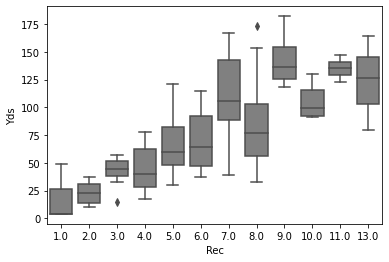

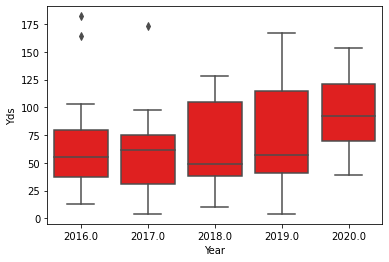

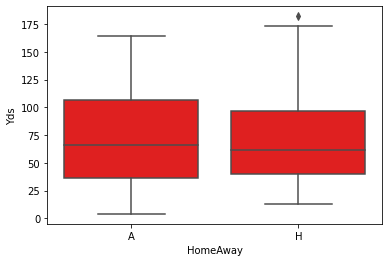

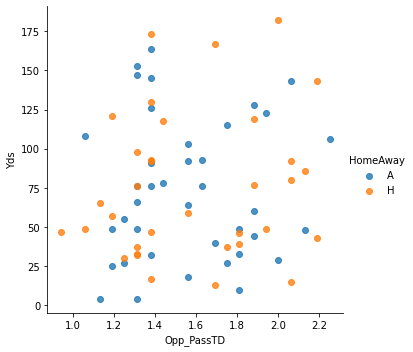

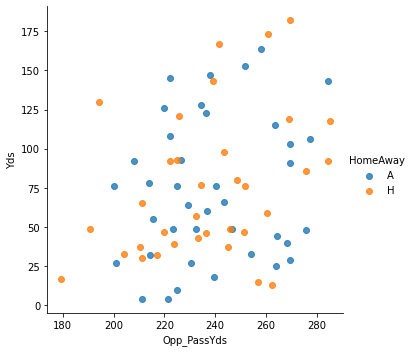

In [22]:
### Boxplots to display relationships
### Receptions and Yards
sns.boxplot(x="Rec", y="Yds", data=Diggs, color = "gray");
plt.show()
### Year and Yards
sns.boxplot(x="Year", y="Yds", data=Diggs, color = "red");
plt.show()
### Homeaway and Yards
sns.boxplot(x="HomeAway", y="Yds", data=Diggs, color = "red");
plt.show()
### Opp PassTds and Yards
sns.lmplot( x="Opp_PassTD", y="Yds", data=Diggs, fit_reg=False, hue='HomeAway', legend=True)
plt.show()
### Opp Pass Yds and Yards
sns.lmplot( x="Opp_PassYds", y="Yds", data=Diggs, fit_reg=False, hue='HomeAway', legend=True)
plt.show()

Text(0.5, 14.09375, 'Regular Season Stats')

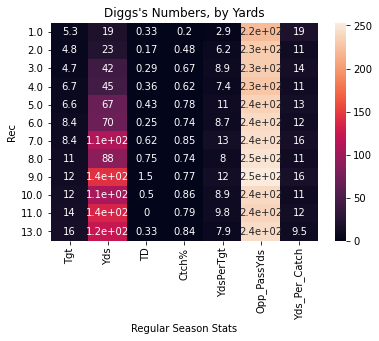

In [26]:
### #Relationship between the varibales with Yards
variables = list(corr.index)
corr_df = Diggs[variables].groupby('Rec').mean()
corr_df
plt.title("Diggs's Numbers, by Yards")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Regular Season Stats")

In [22]:
# Linear Regression Model to predict Diggs's Yds

# employ training-and-test regimen for model validation
np.random.seed(1234)
Diggs['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Diggs))
Diggs_train = Diggs[Diggs['runiform'] >= 0.25]
Diggs_test = Diggs[Diggs['runiform'] < 0.25]
# check training data frame
print('\nDiggs_train data frame (rows, columns): ',Diggs_train.shape)
print(Diggs_train.head())
# check test data frame
print('\nDiggs_test data frame (rows, columns): ',Diggs_test.shape)
print(Diggs_test.head())

# specify a simple model with Yards entered last
my_model = str('Yds ~ Opp_PassYds + Opp_Int + TD + Rec + Opp_PassTD + Opp_Points_Allowed')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Diggs_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Diggs_train['predicted_Yds'] = train_model_fit.fittedvalues
Diggs_test['predicted_Yds'] = train_model_fit.predict(Diggs_test)


Diggs_train data frame (rows, columns):  (58, 22)
     Rk    Year      Date   G#  Week     Age   Tm HomeAway  Opp   Result  ...  \
1  18.0  2016.0   9/18/16  2.0   2.0  22.294  MIN        H  GNB  W 17-14  ...   
2  19.0  2016.0   9/25/16  3.0   3.0  22.301  MIN        A  CAR  W 22-10  ...   
3  20.0  2016.0   10/3/16  4.0   4.0  22.309  MIN        H  NYG  W 24-10  ...   
4  22.0  2016.0  10/23/16  6.0   7.0  22.329  MIN        A  PHI  L 10-21  ...   
5  23.0  2016.0  10/31/16  7.0   8.0  22.337  MIN        A  CHI  L 10-20  ...   

     Yds   TD  YdsPerTgt  Opp_Points_Allowed  Opp_PassYds  Opp_PassTD  \
1  182.0  1.0      16.55                24.3        269.3        2.00   
2   40.0  0.0       5.71                25.1        268.2        1.69   
3   47.0  0.0       6.71                17.8        251.1        0.94   
4   18.0  0.0       3.60                20.7        239.5        1.56   
5   76.0  1.0       5.85                24.9        224.9        1.38   

   Opp_Int  Yds_Per_Cat

<ipython-input-22-66b8704f610b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_train['predicted_Yds'] = train_model_fit.fittedvalues
<ipython-input-22-66b8704f610b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_test['predicted_Yds'] = train_model_fit.predict(Diggs_test)


In [23]:
# Calculate Mean Squared Error
mse = mean_squared_error(Diggs_test['Yds'], Diggs_test['predicted_Yds'])
rmse = np.sqrt(mse)
rmse

30.16858160494951

In [24]:
Diggs_test[['Opp','Rec','Yds','predicted_Yds']]

,Opp,Rec,Yds,predicted_Yds
0,TEN,7.0,103.0,95.697478
17,CHI,1.0,4.0,12.833745
22,ATL,2.0,32.0,13.093275
33,NYJ,8.0,33.0,100.442430
36,GNB,8.0,77.0,98.786358
40,DET,2.0,10.0,31.476106
41,CHI,8.0,47.0,87.679476
42,ATL,2.0,37.0,32.229220
46,NYG,3.0,44.0,57.617408
50,KAN,1.0,4.0,9.365082


In [25]:
Diggs_Bills = Diggs[Diggs['Tm'].isin(['BUF'])]
Diggs_Bills['Yds'].mean()

95.9375

In [26]:
Diggs_Bills_Home['Yds'].mean()

79.5

In [27]:
Diggs_Bills_Home['TD'].mean()

0.375

In [20]:
Diggs_Bills_Home

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,...,Rec,Yds,TD,YdsPerTgt,Opp_Points_Allowed,Opp_PassYds,Opp_PassTD,Opp_Int,Yds_Per_Catch,CtchPer
57,81.0,2020.0,9/13/20,1.0,1.0,26.289,BUF,H,NYJ,W 27-17,...,8.0,86.0,0.0,9.56,28.6,275.6,2.13,0.63,10.75,0.889
59,83.0,2020.0,9/27/20,3.0,3.0,26.303,BUF,H,LAR,W 35-32,...,4.0,49.0,1.0,8.17,18.5,190.7,1.06,0.88,12.25,0.667
62,86.0,2020.0,10/19/20,6.0,6.0,26.325,BUF,H,KAN,L 17-26,...,6.0,46.0,1.0,5.75,22.6,236.2,1.81,1.00,7.67,0.750
64,88.0,2020.0,11/1/20,8.0,8.0,26.338,BUF,H,NWE,W 24-21,...,6.0,92.0,0.0,10.22,22.1,222.3,1.38,1.13,15.33,0.667
65,89.0,2020.0,11/8/20,9.0,9.0,26.345,BUF,H,SEA,W 44-34,...,9.0,118.0,0.0,9.83,23.2,285.0,1.44,0.88,13.11,0.750
67,91.0,2020.0,11/29/20,11.0,12.0,27.000,BUF,H,LAC,W 27-17,...,7.0,39.0,0.0,4.33,26.6,223.6,1.81,0.75,5.57,0.778
69,93.0,2020.0,12/13/20,13.0,14.0,27.014,BUF,H,PIT,W 26-15,...,10.0,130.0,1.0,9.29,19.5,194.4,1.38,1.13,13.00,0.714
72,96.0,2020.0,1/3/21,16.0,17.0,27.035,BUF,H,MIA,W 56-26,...,7.0,76.0,0.0,9.50,21.1,251.5,1.31,1.13,10.86,0.875


In [28]:
# initialize Week 1 opponent data
PittData = [{'Opp_Points_Allowed': 19.5, 'Opp_PassTD': 1.38, 'Rec': 10, 'TD': 1, 'Opp_PassYds' : 194.4, 'Opp_Int': 1.13}]
# Create the pandas DataFrame
Diggs_Pitt = pd.DataFrame(PittData)
Diggs_Pitt

,Opp_Points_Allowed,Opp_PassTD,Rec,TD,Opp_PassYds,Opp_Int
0,19.5,1.38,10,1,194.4,1.13


In [29]:
Diggs_Pitt['predicted_Yds'] = train_model_fit.predict(Diggs_Pitt)
Diggs_Pitt

,Opp_Points_Allowed,Opp_PassTD,Rec,TD,Opp_PassYds,Opp_Int,predicted_Yds
0,19.5,1.38,10,1,194.4,1.13,98.49244


In [34]:
# Linear Regression Model to predict Diggs's Receptions

# employ training-and-test regimen for model validation
np.random.seed(1234)
Diggs['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Diggs))
Diggs_train = Diggs[Diggs['runiform'] >= 0.25]
Diggs_test = Diggs[Diggs['runiform'] < 0.25]
# check training data frame
print('\nDiggs_train data frame (rows, columns): ',Diggs_train.shape)
print(Diggs_train.head())
# check test data frame
print('\nDiggs_test data frame (rows, columns): ',Diggs_test.shape)
print(Diggs_test.head())

# specify a simple model with Yards entered last
my_model = str('Rec ~ Tgt + Opp_PassYds + Opp_Int + TD + Opp_PassTD + Opp_Points_Allowed')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Diggs_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Diggs_train['predicted_Rec'] = train_model_fit.fittedvalues
Diggs_test['predicted_Rec'] = train_model_fit.predict(Diggs_test)


Diggs_train data frame (rows, columns):  (58, 22)
     Rk    Year      Date   G#  Week     Age   Tm HomeAway  Opp   Result  ...  \
1  18.0  2016.0   9/18/16  2.0   2.0  22.294  MIN        H  GNB  W 17-14  ...   
2  19.0  2016.0   9/25/16  3.0   3.0  22.301  MIN        A  CAR  W 22-10  ...   
3  20.0  2016.0   10/3/16  4.0   4.0  22.309  MIN        H  NYG  W 24-10  ...   
4  22.0  2016.0  10/23/16  6.0   7.0  22.329  MIN        A  PHI  L 10-21  ...   
5  23.0  2016.0  10/31/16  7.0   8.0  22.337  MIN        A  CHI  L 10-20  ...   

     Yds   TD  Ctch%  YdsPerTgt  Opp_Points_Allowed  Opp_PassYds  Opp_PassTD  \
1  182.0  1.0  0.818      16.55                24.3        269.3        2.00   
2   40.0  0.0  0.571       5.71                25.1        268.2        1.69   
3   47.0  0.0  0.714       6.71                17.8        251.1        0.94   
4   18.0  0.0  0.400       3.60                20.7        239.5        1.56   
5   76.0  1.0  0.615       5.85                24.9        224

<ipython-input-34-ec86ae3b5734>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_train['predicted_Rec'] = train_model_fit.fittedvalues
<ipython-input-34-ec86ae3b5734>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_test['predicted_Rec'] = train_model_fit.predict(Diggs_test)


In [35]:
# Calculate Mean Squared Error
mse = mean_squared_error(Diggs_test['Rec'], Diggs_test['predicted_Rec'])
rmse = np.sqrt(mse)
rmse

1.938261342634606

In [36]:
Diggs_test[['Opp','Rec','Yds','predicted_Rec']]

,Opp,Rec,Yds,predicted_Rec
0,TEN,7.0,103.0,7.185543
17,CHI,1.0,4.0,2.869180
22,ATL,2.0,32.0,3.658236
33,NYJ,8.0,33.0,11.369729
36,GNB,8.0,77.0,8.339902
40,DET,2.0,10.0,4.395547
41,CHI,8.0,47.0,6.558327
42,ATL,2.0,37.0,1.220239
46,NYG,3.0,44.0,3.025410
50,KAN,1.0,4.0,3.319024


In [44]:
# Linear Regression Model to predict Diggs's Targets

# employ training-and-test regimen for model validation
np.random.seed(1234)
Diggs['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Diggs))
Diggs_train = Diggs[Diggs['runiform'] >= 0.25]
Diggs_test = Diggs[Diggs['runiform'] < 0.25]
# check training data frame
print('\nDiggs_train data frame (rows, columns): ',Diggs_train.shape)
print(Diggs_train.head())
# check test data frame
print('\nDiggs_test data frame (rows, columns): ',Diggs_test.shape)
print(Diggs_test.head())

# specify a simple model with Yards entered last
my_model = str('Tgt ~ Rec + Opp_PassYds + Opp_Int + Opp_PassTD + Opp_Points_Allowed')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Diggs_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Diggs_train['predicted_Tgt'] = train_model_fit.fittedvalues
Diggs_test['predicted_Tgt'] = train_model_fit.predict(Diggs_test)


Diggs_train data frame (rows, columns):  (58, 22)
     Rk    Year      Date   G#  Week     Age   Tm HomeAway  Opp   Result  ...  \
1  18.0  2016.0   9/18/16  2.0   2.0  22.294  MIN        H  GNB  W 17-14  ...   
2  19.0  2016.0   9/25/16  3.0   3.0  22.301  MIN        A  CAR  W 22-10  ...   
3  20.0  2016.0   10/3/16  4.0   4.0  22.309  MIN        H  NYG  W 24-10  ...   
4  22.0  2016.0  10/23/16  6.0   7.0  22.329  MIN        A  PHI  L 10-21  ...   
5  23.0  2016.0  10/31/16  7.0   8.0  22.337  MIN        A  CHI  L 10-20  ...   

     Yds   TD  YdsPerTgt  Opp_Points_Allowed  Opp_PassYds  Opp_PassTD  \
1  182.0  1.0      16.55                24.3        269.3        2.00   
2   40.0  0.0       5.71                25.1        268.2        1.69   
3   47.0  0.0       6.71                17.8        251.1        0.94   
4   18.0  0.0       3.60                20.7        239.5        1.56   
5   76.0  1.0       5.85                24.9        224.9        1.38   

   Opp_Int  Yds_Per_Cat

<ipython-input-44-2f8881103778>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_train['predicted_Tgt'] = train_model_fit.fittedvalues
<ipython-input-44-2f8881103778>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diggs_test['predicted_Tgt'] = train_model_fit.predict(Diggs_test)
